In [7]:
import numpy as np
import emcee
from scipy.optimize import root_scalar
from scipy.integrate import solve_ivp
import astropy.coordinates as coord
import astropy.units as u
import corner
import matplotlib.pyplot as plt
import multiprocessing

In [1]:
# 定义二体问题的微分方程
G=43018
def two_body_equation(t, y, M):
    """
    二体问题的微分方程
    参数:
        t: 时间 (Gyr)
        y: 状态向量 [x, y, z, vx, vy, vz]
        M: 中心天体质量 (10^10 Msun)
    返回:
        dydt: 状态向量的导数 [vx, vy, vz, ax, ay, az]
    """
    x, y, z, vx, vy, vz = y
    r = np.sqrt(x**2 + y**2 + z**2)
    ax = -G * M * x / r**3
    ay = -G * M * y / r**3
    az = -G * M * z / r**3
    return [vx, vy, vz, ax, ay, az]




# 初始条件（kpc, km/s需转换）
y0 = np.zeros(6)
y0[0:3] = [-0.6143609652013762,-41.02036741646231, -26.832974651917674]# [500,0,0] #LMC初始位置
y0[3:6] = [-69.81047009397867, -221.9356211949808, 214.01029566668603]# [0,40,0]#     # LMC初始速度


# 时间范围（Gyr）
t_span = (0, 5)  # 积分10 Gyr
M = 100
# 求解ODE
sol = solve_ivp(two_body_equation, t_span, y0, method='RK45', rtol=1e-7,t_eval=np.linspace(t_span[0], t_span[1], 1000),args=(M,))

# 提取结果
t = sol.t
x_LMC, y_LMC, z_LMC = sol.y[0], sol.y[1], sol.y[2]
vx_LMC, vy_LMC, vz_LMC = sol.y[3], sol.y[4], sol.y[5]


NameError: name 'np' is not defined

In [2]:
# 三维轨迹可视化
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_LMC, y_LMC, z_LMC, label='LMC Orbit')

ax.scatter(x_LMC[0], y_LMC[0], z_LMC[0], c='r', marker='o', label='LMC Initial')

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_xlim(-300, 300)
ax.set_ylim(-300, 300)
ax.set_zlim(-300, 300)
plt.legend()
plt.show()

NameError: name 'plt' is not defined

t=3 Gyr时的LMC位置: (-8.72, -15.28, 35.87) kpc
t=3 Gyr时的LMC速度: (-46.98, -395.11, -36.64) km/s


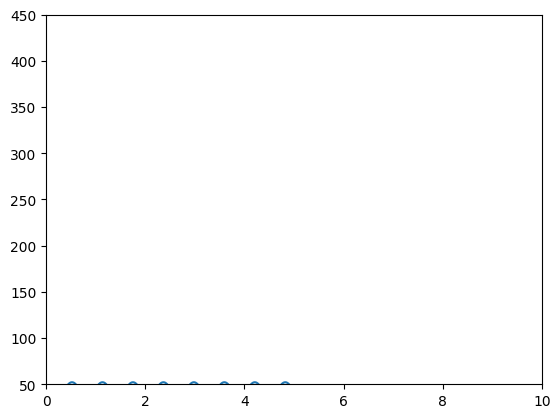

In [9]:
rlmc_mw = np.sqrt((x_LMC)**2 + (y_LMC )**2 + (z_LMC)**2)
plt.plot(t, rlmc_mw)
plt.xlim(0, 10)
plt.ylim(50, 450)
#t=3时候的速度位置
t_index = np.argmin(np.abs(t - 2.8))
x_LMC_3 = x_LMC[t_index]
y_LMC_3 = y_LMC[t_index]
z_LMC_3 = z_LMC[t_index]
vx_LMC_3 = vx_LMC[t_index]
vy_LMC_3 = vy_LMC[t_index]
vz_LMC_3 = vz_LMC[t_index]
print(f"t=3 Gyr时的LMC位置: ({x_LMC_3:.2f}, {y_LMC_3:.2f}, {z_LMC_3:.2f}) kpc")
print(f"t=3 Gyr时的LMC速度: ({vx_LMC_3:.2f}, {vy_LMC_3:.2f}, {vz_LMC_3:.2f}) km/s")

In [1]:
233**2*8.2/43018

10.348454135478171

In [5]:
10.348+(np.exp(-2.733)*3.733-1.)*5-1

np.float64(5.561671559987996)

In [2]:
8.2/3

2.733333333333333

In [1]:
a= 25
5.56*(1+8.2/a)**2/(8.2/a)**2#/2/np.pi/a**3

91.14298631766806